 ## Describe your dataset

Data Set Description:

Data obtained from a call center. It represents leads that are called for certain campaigns. Each call time is logged along with the call result. Additionally the employee who made the call is logged



The data set contains the following columns:

1. CampaingID - A ID designating the campaign a lead was assigned to - Object 
2. Cust_ID - The ID used to denote a unique customer in that campaign - Integer
3. Phone_Number - Encrypted phonenumber of the lead
4. Call_Start - The time a call started - Object
5. Call_End - The time a call ended - Object
6. Log_Time - Time the call was logged in the system - Object
7. Connection - Denoting that a connection was made. - Integer
8. EMP_ID - The employee ID used to make a call - Integer
9. ActionID - Ordered sequence - Integer
10. Call_Result - The outcome of the call instance - Object
11. ImpportedDate - Date of data ingestion - Object

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('ExportCustomerActions.csv')

C:\Users\jesse\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.dtypes

CampaignID        object
Cust_ID            int64
Phone_Number      object
Call_Start        object
Call_End          object
Log_Time          object
Call_Result       object
Connected          int64
Connection_ID    float64
Emp_ID             int64
ActionID           int64
ImportedDate      object
dtype: object

### View the Data

In [4]:
df.head()

,CampaignID,Cust_ID,Phone_Number,Call_Start,Call_End,Log_Time,Call_Result,Connected,Connection_ID,Emp_ID,ActionID,ImportedDate
0,B7270,4,061*******,2018-01-03 15:52:02.340,2018-01-03 15:52:03.510,2018-01-03 15:53:43.510,sale,1,NaN,13439,1,NaN
1,B7270,5,073*******,2018-01-03 15:53:46.383,2018-01-03 15:53:47.490,2018-01-03 15:58:18.923,sale,1,NaN,13439,2,NaN
2,B7270,6,071*******,2018-01-03 16:11:13.747,2018-01-03 16:11:15.687,2018-01-03 16:13:07.390,sale,1,NaN,13439,3,NaN
3,B7270,7,079*******,2018-01-25 12:18:53.887,2018-01-25 12:18:55.977,2018-01-25 12:19:00.523,voice mail / answering machine,1,1.249150e+09,16778,4,NaN
4,B7270,7,079*******,2018-01-26 14:21:57.887,2018-01-26 14:21:59.863,2018-01-26 14:22:04.837,voice mail / answering machine,1,1.249159e+09,16761,5,NaN


### Drop Un-needed Columns

1. Phone_Number is encrypted and not unique, no analysis can be done here
2. Log_Time occurs at the same time as Call_End and is redundant
3. Connected denotes an operation in the call center's software
4. ActionID is an ordered list that does not tell us anything about the lead
5. Imported Date has many Nans

In [5]:
df = df[['CampaignID', 'Cust_ID', 'Call_Start', 'Call_End',
        'Call_Result', 'Emp_ID']]

In [6]:
df.head()

,CampaignID,Cust_ID,Call_Start,Call_End,Call_Result,Emp_ID
0,B7270,4,2018-01-03 15:52:02.340,2018-01-03 15:52:03.510,sale,13439
1,B7270,5,2018-01-03 15:53:46.383,2018-01-03 15:53:47.490,sale,13439
2,B7270,6,2018-01-03 16:11:13.747,2018-01-03 16:11:15.687,sale,13439
3,B7270,7,2018-01-25 12:18:53.887,2018-01-25 12:18:55.977,voice mail / answering machine,16778
4,B7270,7,2018-01-26 14:21:57.887,2018-01-26 14:21:59.863,voice mail / answering machine,16761


### Volume

In [7]:
# Number of total calls
len(df)

9451320

### Variety

#### Reasons for Sale or Non-Sale

In [8]:
# Number of reasons
len(df['Call_Result'].unique())

122

In [9]:
# Types of reasons
df['Call_Result'].unique()

array(['sale', 'voice mail / answering machine', 'training',
       'wrong client', 'number updated', 'not interested',
       'call back presentation', 'call back no presentation',
       'phone not answered / client does not speak', 'wrong number',
       'pending misrepresentation: questions - costs',
       'pending : banking details',
       'call back presentation( account number)', 'verified sale',
       'language barrier isiswati', 'pending : confirmation questions',
       'client not available', 'language barrier tswana',
       'language barrier zulu', 'language barrier sotho', 'bad line',
       'pending misreprersentation: other', 'client cancelled sale',
       'query', 'pending misrepresentation: questions - benefits',
       'pending misrepresentation: compulsory benefits',
       'pending: banking details', 'language barrier afrikaans',
       'client never wants to be called again\xa0',
       'language barrier xhosa', 'language barrier venda',
       'language barri

#### Number of Employees

In [10]:
len(df['Emp_ID'].unique())

3001

#### Number of Campaigns 

In [11]:
len(df['CampaignID'].unique())

100

### Velocity

In [12]:
df['Call_Start'] = pd.to_datetime(df['Call_Start'] )
df['Call_End'] = pd.to_datetime(df['Call_End'] )

In [13]:
max(df['Call_Start'] )

Timestamp('2021-09-17 12:13:02.750000')

In [14]:
min(df['Call_Start'] )

Timestamp('2017-12-21 07:28:56.897000')

#### Look at Recent Month for Daily Call Volumn

In [15]:
df_recent = df[ (df['Call_Start'] < '2021-09-01') & (df['Call_Start'] >= '2021-08-01')]

In [16]:
min(df_recent['Call_Start']),max(df_recent['Call_Start'])

(Timestamp('2021-08-01 09:40:28.307000'),
 Timestamp('2021-08-31 16:18:22.090000'))

In [17]:
df_recent['Year'] = df_recent['Call_Start'].dt.year
df_recent['Month'] = df_recent['Call_Start'].dt.month
df_recent['Day'] = df_recent['Call_Start'].dt.day

<ipython-input-17-71814fa3ae76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Year'] = df_recent['Call_Start'].dt.year
<ipython-input-17-71814fa3ae76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Month'] = df_recent['Call_Start'].dt.month
<ipython-input-17-71814fa3ae76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [18]:
df_recent[['Day','Cust_ID']].groupby('Day').count()

,Cust_ID
Day,
1,54
2,3574
3,4336
4,4524
5,5216
6,3852
7,906
8,38
9,28


### Veracity

The call center is based in South Africa. The South African economy took a massive hit during the first hard lockdown which occured in April/May 2020. If calls decreased over this period, it represents a check that this data is correct

In [19]:
df_2020 = df[ (df['Call_Start'] < '2021-01-01') & (df['Call_Start'] >= '2020-01-01')]

min(df_2020['Call_Start']),max(df_2020['Call_Start'])

(Timestamp('2020-01-02 08:00:43.127000'),
 Timestamp('2020-12-23 14:53:01.820000'))

In [20]:
df_2020['Year'] = df_2020['Call_Start'].dt.year
df_2020['Month'] = df_2020['Call_Start'].dt.month
df_2020['Day'] = df_2020['Call_Start'].dt.day

<ipython-input-20-8325639fca97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Year'] = df_2020['Call_Start'].dt.year
<ipython-input-20-8325639fca97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Month'] = df_2020['Call_Start'].dt.month
<ipython-input-20-8325639fca97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

<IPython.core.display.Javascript object>


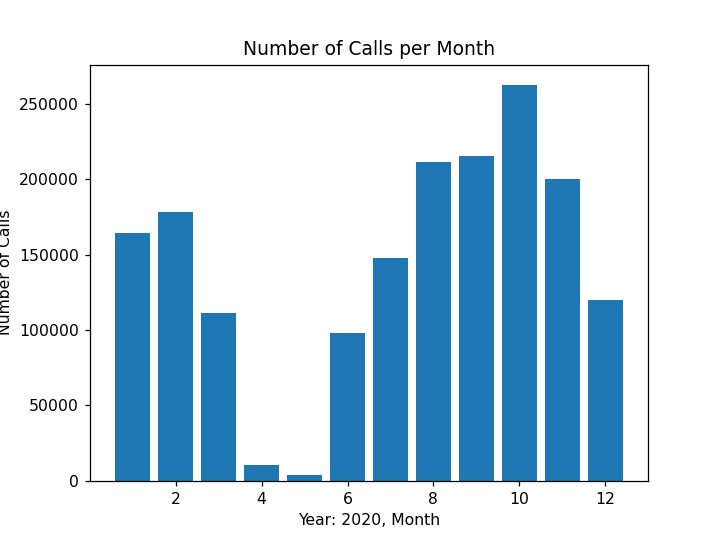

In [21]:
plt.figure(1)
plt.bar(df_2020.groupby(['Year','Month']).count()['Call_Start'].reset_index()['Month'],
        df_2020.groupby(['Year','Month']).count()['Call_Start'].reset_index()['Call_Start'])
plt.xlabel('Year: 2020, Month')
plt.ylabel('Number of Calls')
plt.title('Number of Calls per Month')
plt.show()

### Value

This data set is valuable because as business can track the following KPI's:

1. Number of calls per day to see that their agents are productive across a month - Volume
2. Conversion per campaign to see which campaign and methods used in the campaign are most valuable - Value + Veracity
3. Reasons why certain customers do not want the product - Variety
4. Call volume per  to see if agents are calling at the right times - Velocity
5. Conversions per agent to see which agents are the most valuable -> associated raises and bonuses - Value + Veracity
6. Call time per client - higher call times means there are greater costs involved
7. Calls per conversion

### Data Subset

In [22]:
df_B8356 = df[df['CampaignID']=='B8356']

In [23]:
df_B8356['Year'] = df_B8356['Call_Start'].dt.year
df_B8356['Month'] = df_B8356['Call_Start'].dt.month
df_B8356['Day'] = df_B8356['Call_Start'].dt.day
df_B8356['Hour'] = df_B8356['Call_Start'].dt.hour

conditions = [
    (df_B8356['Call_Result'] == 'sale'),
    (df_B8356['Call_Result'] != 'sale') 
    ]

# create a list of the values we want to assign for each condition
values = [1,0]

# create a new column and use np.select to assign values to it using our lists as arguments
df_B8356['Target'] = np.select(conditions, values)

<ipython-input-23-0f118e23c67f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B8356['Year'] = df_B8356['Call_Start'].dt.year
<ipython-input-23-0f118e23c67f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B8356['Month'] = df_B8356['Call_Start'].dt.month
<ipython-input-23-0f118e23c67f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

#### Calls per Day

In [24]:
df_B8356_summary = df_B8356.groupby(['Year','Month','Day']).count()['Call_Start'].reset_index()

df_B8356_summary['Year_Month_day'] = df_B8356_summary['Year'].astype(str)+'-0'+df_B8356_summary['Month'].astype(str)+'-'+df_B8356_summary['Day'].astype(str)

<IPython.core.display.Javascript object>


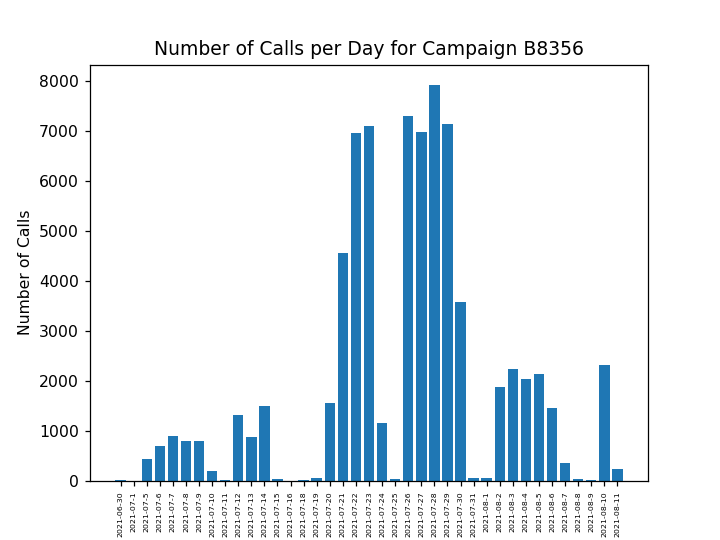

In [25]:
plt.figure(2)
plt.bar(df_B8356_summary['Year_Month_day'],
        df_B8356_summary['Call_Start'])
plt.xlabel('Day')
plt.xticks(rotation=90,size=5)
plt.ylabel('Number of Calls')
plt.title('Number of Calls per Day for Campaign B8356')
plt.show()

### Sales per Day

In [26]:
df_B8356_summary = df_B8356.groupby(['Year','Month','Day']).sum()['Target'].reset_index()

df_B8356_summary['Year_Month_day'] = df_B8356_summary['Year'].astype(str)+'-0'+df_B8356_summary['Month'].astype(str)+'-'+df_B8356_summary['Day'].astype(str)

In [27]:
df_B8356_summary['Cum_Sales']=df_B8356_summary['Target'].cumsum(axis = 0, skipna = True)

<IPython.core.display.Javascript object>


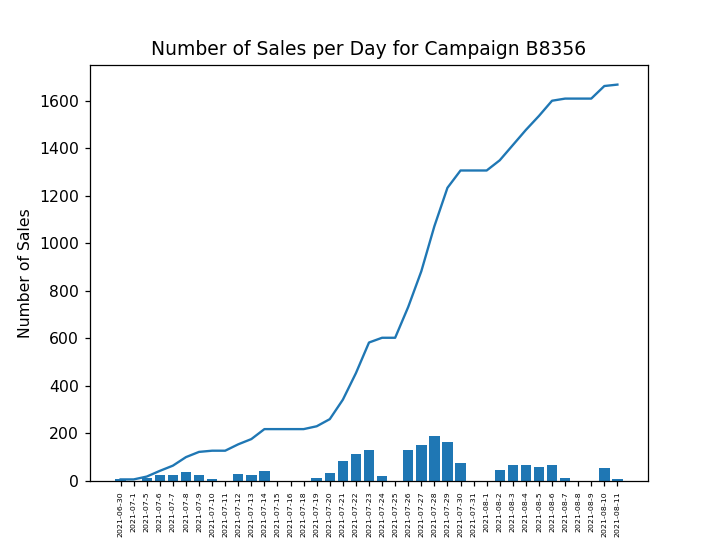

In [28]:
plt.figure(3)
plt.bar(df_B8356_summary['Year_Month_day'],
        df_B8356_summary['Target'])
plt.plot(df_B8356_summary['Year_Month_day'],
        df_B8356_summary['Cum_Sales'])
plt.xlabel('Day')
plt.xticks(rotation=90,size=5)
plt.ylabel('Number of Sales')
plt.title('Number of Sales per Day for Campaign B8356')
plt.show()

#### Conversion Per Agent

In [29]:
df_B8356_summary = df_B8356.groupby(['Year','Month','Day','Emp_ID']).sum()['Target'].reset_index()

df_B8356_summary['Year_Month_day'] = df_B8356_summary['Year'].astype(str)+'-0'+df_B8356_summary['Month'].astype(str)+'-'+df_B8356_summary['Day'].astype(str)

result_agent_by_day = df_B8356_summary.pivot(index='Emp_ID', columns='Year_Month_day', values='Target')

<IPython.core.display.Javascript object>


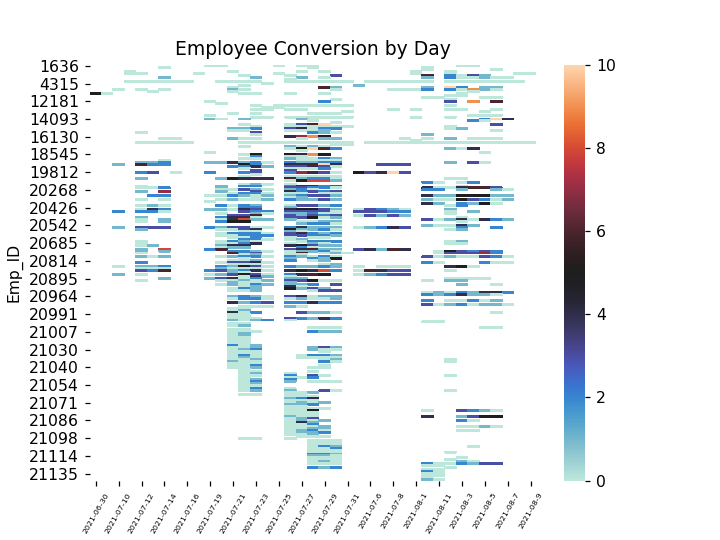

In [30]:
plt.figure(4)
plt.title('Employee Conversion by Day')
sns.heatmap(result_agent_by_day, vmin=0, vmax=10, center=5)
plt.xticks(rotation=60,size=5)
plt.show()

#### Reasons on Call

In [31]:
df_B8356['Ones'] = 1

df_B8356_summary = df_B8356.groupby('Call_Result').sum()[['Ones']].reset_index().sort_values('Ones',ascending=False)


<ipython-input-31-7477c12e4a54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B8356['Ones'] = 1


<IPython.core.display.Javascript object>


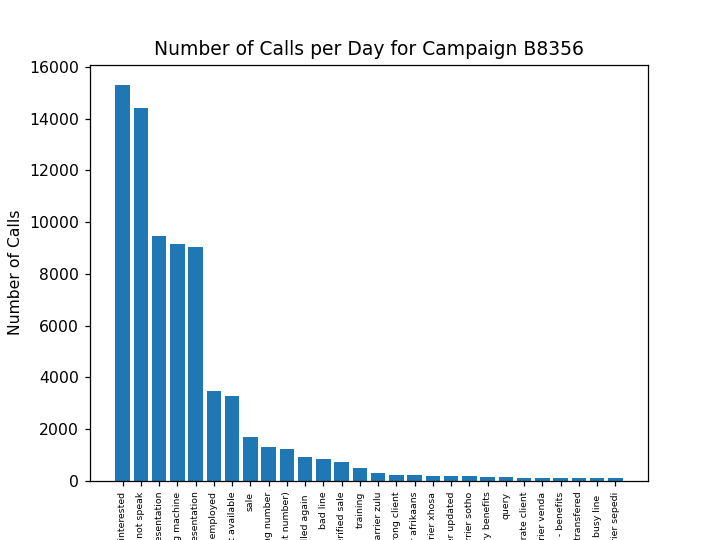

In [32]:
plt.figure(5)
plt.bar(df_B8356_summary['Call_Result'].loc[:20],
        df_B8356_summary['Ones'].loc[:20])
plt.xlabel('Reason')
plt.xticks(rotation=90,size=6)
plt.ylabel('Number of Calls')
plt.title('Number of Calls per Day for Campaign B8356')
plt.show()